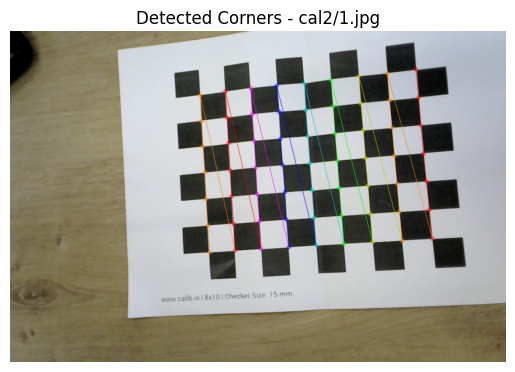

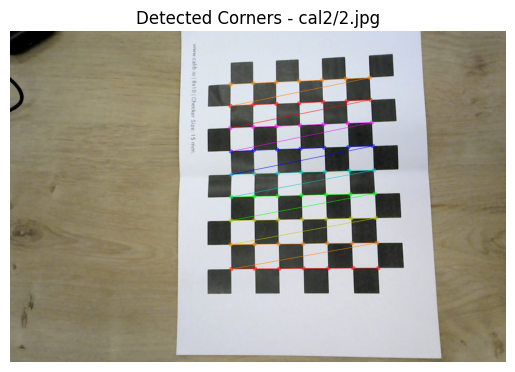

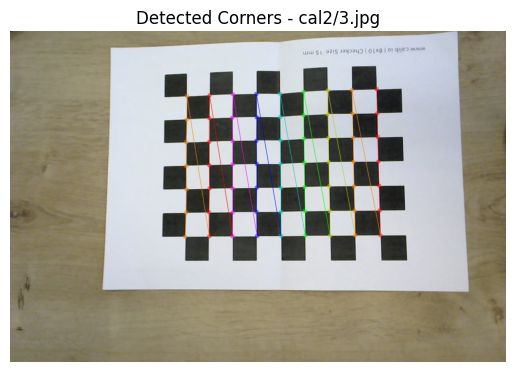

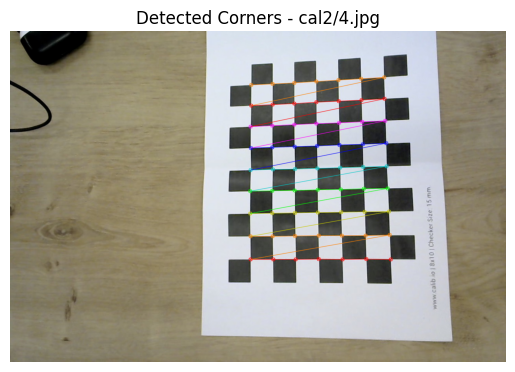

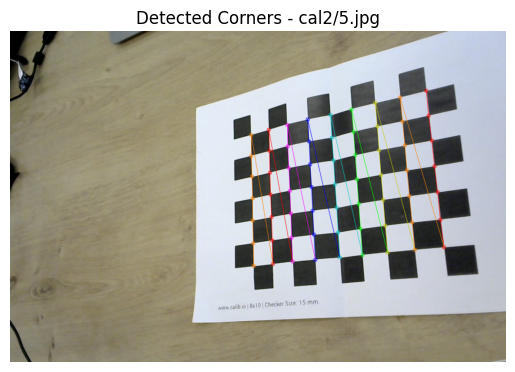

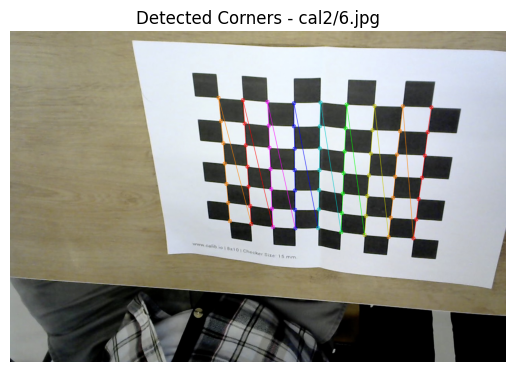

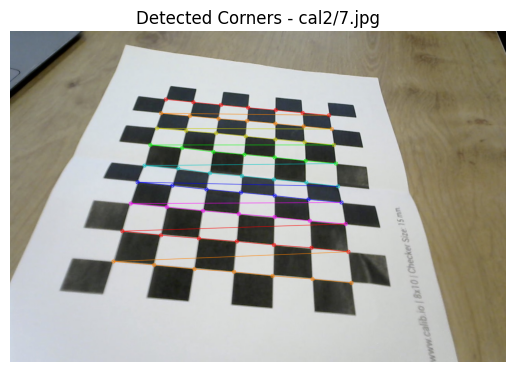

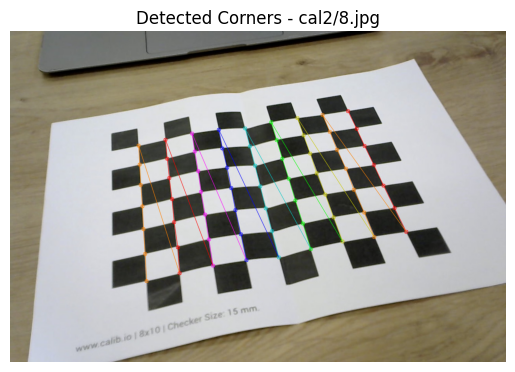

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define chessboard size (Adjust if necessary)
chessboard_size = (7, 9)  # (Columns, Rows) - Change if needed
square_size = 15.0  # Set to 1.0 if unknown

# Prepare object points (3D points of chessboard corners in real-world)
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2) * square_size

# Lists to store 3D points (object points) and 2D points (image points)
objpoints = []  # Real-world points
imgpoints = []  # Image points (detected corners)

# List of calibration images (jpg format)
image_paths = ["cal2/1.jpg","cal2/2.jpg","cal2/3.jpg","cal2/4.jpg","cal2/5.jpg","cal2/6.jpg","cal2/7.jpg","cal2/8.jpg",]

# Read and process each calibration image
for img_path in image_paths:
    img = cv2.imread(img_path)   #Reads the image from the specified path
    
    if img is None:
        print(f"Error: Could not load {img_path}")
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Detect chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None) # Detects the corners of a chessboard pattern, 
    #gray: The grayscale input image.
    #chessboard_size: The number of inner corners per chessboard row and column.

    #Reutrns of the functions are as follows: 

    #ret: Boolean indicating success (True) or failure (False) in detecting the chessboard.
    #corners: Detected corner positions (if found).

    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, chessboard_size, corners, ret) # Draws detected chessboard corners on an image.
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Displays an image using Matplotlib.
        plt.title(f"Detected Corners - {img_path}")
        plt.axis("off")
        plt.show()
    else:
        print(f"Chessboard not detected in {img_path}")


## Intrinsic Parameters


In [3]:
# Performed camera calibration
if len(objpoints) > 0 and len(imgpoints) > 0:
    ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) #Computes the intrinsic parameters
    #(camera matrix K) and extrinsic parameters (rotation and translation vectors) of the camera. 

    #objpoints: 3D real-world coordinates of chessboard corners.
    #imgpoints: 2D image coordinates of detected corners.
    #gray.shape[::-1]: Image size in (width, height) format.
    #None, None: The initial guess for cameraMatrix and distCoeffs (optional).

    #ret: The RMS (Root Mean Square) re-projection error, indicating calibration accuracy.
    #K: The intrinsic matrix (camera matrix).
    #dist: The distortion coefficients (to correct lens distortion).
    #rvecs: Rotation vectors for each calibration image.
    #tvecs: Translation vectors for each calibration image.



    print("Intrinsic Matrix (K):\n", K)
    print("\nDistortion Coefficients:\n", dist)

    # Computed reprojection error
    reprojection_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist) # Reprojects 3D world points (objectPoints) back into 2D image space using the computed camera parameters. 
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)    # Computes the difference (error) between two sets of points using the L2 norm (Euclidean distance). 

        reprojection_error += error
    reprojection_error /= len(objpoints)

    print("\nReprojection Error:", reprojection_error)

else:
    print("Calibration failed: No valid chessboard detections.")


Intrinsic Matrix (K):
 [[1.55593613e+03 0.00000000e+00 7.56076066e+02]
 [0.00000000e+00 1.56149035e+03 4.97557879e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients:
 [[ 2.51602510e-01 -3.20063051e+00  1.83156042e-02  1.08366488e-02
   1.58031826e+01]]

Reprojection Error: 0.26538355416644765


## Stereo Callibration 



In [ ]:
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC

## Undistord 

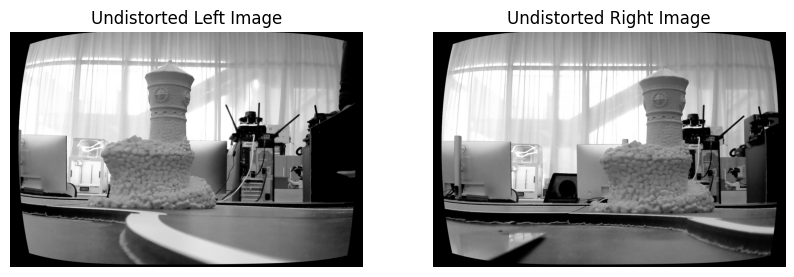

In [4]:
# Loading left and right images
left_img = cv2.imread("cal2/left.jpg")
right_img = cv2.imread("cal2/right.jpg")

# Convert to grayscale
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

# Undistort images
undistorted_left = cv2.undistort(left_gray, K, dist) # Removes distortion from an image using a precomputed camera matrix (K) and distortion coefficients.Corrects radial and tangential distortions caused by the camera lens, ensuring straight lines remain straight.
undistorted_right = cv2.undistort(right_gray, K, dist)

# Display the undistorted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(undistorted_left, cmap="gray")
plt.title("Undistorted Left Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(undistorted_right, cmap="gray")
plt.title("Undistorted Right Image")
plt.axis("off")

plt.show()


## Feature Matching 

Feature matching image saved as sift_matches.png


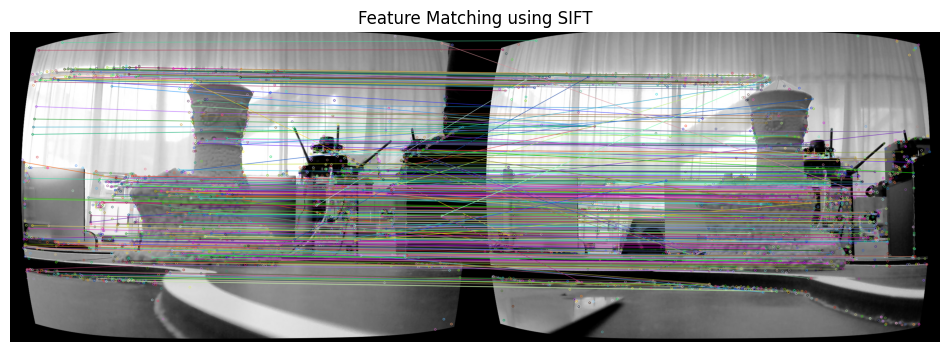

[< cv2.DMatch 0x291bfe450>, < cv2.DMatch 0x2923a2e10>, < cv2.DMatch 0x2923a3d50>, < cv2.DMatch 0x2923a2310>, < cv2.DMatch 0x2923a2e50>, < cv2.DMatch 0x2923a3030>, < cv2.DMatch 0x2923a2ff0>, < cv2.DMatch 0x2923a2870>, < cv2.DMatch 0x2921f65f0>, < cv2.DMatch 0x2921f5450>, < cv2.DMatch 0x2921f6d30>, < cv2.DMatch 0x2921f7d90>, < cv2.DMatch 0x2921f7c30>, < cv2.DMatch 0x2921f7e70>, < cv2.DMatch 0x2921f6a50>, < cv2.DMatch 0x2921f7c70>, < cv2.DMatch 0x2921f7c10>, < cv2.DMatch 0x2921f7290>, < cv2.DMatch 0x2921f7bf0>, < cv2.DMatch 0x2921f6e90>, < cv2.DMatch 0x2921f7230>, < cv2.DMatch 0x2921f7030>, < cv2.DMatch 0x2921f7c90>, < cv2.DMatch 0x2921f7a70>, < cv2.DMatch 0x2921f5cf0>, < cv2.DMatch 0x2921f73f0>, < cv2.DMatch 0x2921f64b0>, < cv2.DMatch 0x2921f66f0>, < cv2.DMatch 0x2921f6bf0>, < cv2.DMatch 0x2921f5410>, < cv2.DMatch 0x2921f5370>, < cv2.DMatch 0x2921f5ab0>, < cv2.DMatch 0x2921f5810>, < cv2.DMatch 0x2921f6db0>, < cv2.DMatch 0x2921f6b90>, < cv2.DMatch 0x2921f69d0>, < cv2.DMatch 0x2921f6dd0>, 

In [5]:
# Detect and compute SIFT keypoints
sift = cv2.SIFT_create()                                     # Creates a SIFT (Scale-Invariant Feature Transform) detector.
kp1, des1 = sift.detectAndCompute(undistorted_left, None)    # Detects keypoints and computes their descriptors in a given image.
kp2, des2 = sift.detectAndCompute(undistorted_right, None)

# Feature Matching using FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)  # Improves speed for large feature sets compared to brute-force matching.

# algorithm=FLANN_INDEX_KDTREE: Uses KD-Tree for nearest neighbor search.
# trees=5: Defines the number of trees in the index.
# checks=50: Limits the number of times the tree is recursively traversed.

matches = flann.knnMatch(des1, des2, k=2)  # Finds the k best matches for each descriptor using the k-Nearest Neighbors (KNN) algorithm.


# Apply Lowe's ratio test to Filter matches to keep only the best ones. Threshold = 0.75
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
matched_img = cv2.drawMatches(undistorted_left, kp1, undistorted_right, kp2, good_matches, None) #Draws lines connecting matched keypoints between two images.

# Save the output image
output_path = "sift_matches.png"
cv2.imwrite(output_path, matched_img)
print(f"Feature matching image saved as {output_path}")

# Show matched features
plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.title("Feature Matching using SIFT")
plt.axis("off")
plt.show()

print(good_matches)



## Eppipolar Lines

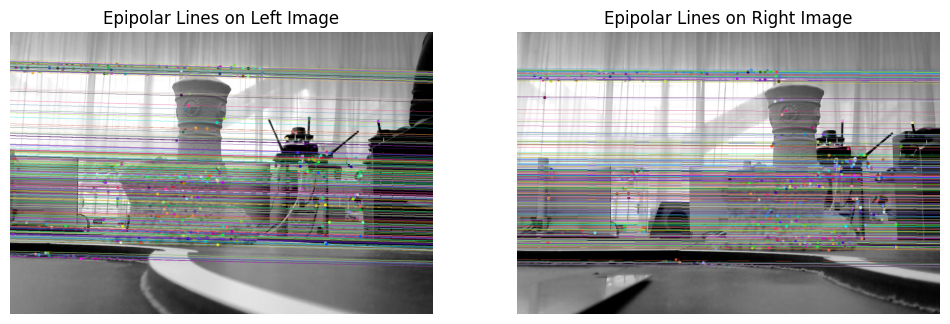

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
left_img = cv2.imread("cal2/left.jpg", cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread("cal2/right.jpg", cv2.IMREAD_GRAYSCALE)

# Detect and compute SIFT keypoints
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(left_img, None)
kp2, des2 = sift.detectAndCompute(right_img, None)

# Feature Matching using FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# Compute the Fundamental Matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC) # F, mask = cv2.findFundamentalMat(pts1, pts2, method)


# Select only inliers
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

# Compute epipolar lines
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F).reshape(-1, 3) # Computes epipolar lines for points in one image that must lie on corresponding lines in the other.

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F).reshape(-1, 3)

def draw_epilines(img, lines, pts):
    """Draws epipolar lines on an image."""
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    r, c = img.shape[:2]
    for r, pt in zip(lines, pts):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])  # Line intersection with left border
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])  # Line intersection with right border
        cv2.line(img_color, (x0, y0), (x1, y1), color, 1)
        cv2.circle(img_color, tuple(pt.astype(int)), 5, color, -1)
    return img_color

# Draw epipolar lines
left_with_lines = draw_epilines(left_img, lines1, pts1)
right_with_lines = draw_epilines(right_img, lines2, pts2)

# Show the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(left_with_lines)
plt.title("Epipolar Lines on Left Image"), plt.axis("off")
plt.subplot(122), plt.imshow(right_with_lines)
plt.title("Epipolar Lines on Right Image"), plt.axis("off")
plt.show()


## Fundamental Matrix

In [7]:
# Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# Compute Fundamental Matrix with RANSAC
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC) #Computes the Fundamental Matrix (F), which describes the epipolar geometry between two views of the same scene.

print("Fundamental Matrix (F):\n", F)


Fundamental Matrix (F):
 [[-2.04672595e-09  4.43487265e-08  1.79395745e-04]
 [ 1.59676363e-07 -2.97484906e-07 -3.29600217e-02]
 [-9.13521400e-04  3.29796592e-02  1.00000000e+00]]


## Essential Matrix & Camera Pose

In [8]:
# Compute Essential Matrix
E, _ = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC) # Computes the Essential Matrix (E), which encodes the relative rotation and translation between two views assuming a calibrated camera.

# Recover the Camera Pose
_, R, t, _ = cv2.recoverPose(E, pts1, pts2, K) # Recovers the rotation (R) and translation (t) from the Essential Matrix.

print("Essential Matrix (E):\n", E)
print("\nRotation Matrix (R):\n", R)
print("\nTranslation Vector (t):\n", t)


Essential Matrix (E):
 [[-1.97367359e-04  1.63543471e-02 -7.46884753e-03]
 [-2.31588293e-02 -6.50445708e-03  7.06656522e-01]
 [ 1.93839000e-02 -7.06627457e-01 -6.04437319e-03]]

Rotation Matrix (R):
 [[ 0.999814    0.01657186  0.00986649]
 [-0.01665745  0.99982378  0.00865703]
 [-0.00972129 -0.00881977  0.99991385]]

Translation Vector (t):
 [[0.99967666]
 [0.01076291]
 [0.02303767]]


## Triangulation

In [9]:
# Projection matrices
P1 = np.dot(K, np.hstack((np.eye(3), np.zeros((3, 1)))))  # Camera 1
P2 = np.dot(K, np.hstack((R, t)))  # Camera 2

# Perform triangulation
points_4D = cv2.triangulatePoints(P1, P2, pts1.T, pts2.T) #  Computes the 3D coordinates of points by triangulating them from two views.
points_3D = points_4D[:3] / points_4D[3]  # Convert from homogeneous to 3D coordinates

print("Triangulated 3D Points:\n", points_3D.T)


Triangulated 3D Points:
 [[-10.052888     2.57147     20.948065  ]
 [-10.1102085    0.4099785   21.192095  ]
 [-10.1102085    0.4099785   21.192095  ]
 ...
 [ -0.5788197   -0.17429829  -1.4791033 ]
 [ -1.1974665    0.39154017  -3.0212104 ]
 [ -2.8991985    0.9751891   -7.181989  ]]


## 3D Visualization

In [10]:
import open3d as o3d

# Convert triangulated 3D points into Open3D point cloud format
points_3D = points_3D.T  # Transpose to (N,3) format
point_cloud = o3d.geometry.PointCloud() # Creates an empty point cloud object in Open3D.
point_cloud.points = o3d.utility.Vector3dVector(points_3D) # Converts a NumPy array of 3D points into an Open3D Vector3dVector format.

# Save the 3D point cloud to a file
output_path = "point_cloud.ply"
o3d.io.write_point_cloud(output_path, point_cloud) # Saves the 3D point cloud to a file.
print(f"3D point cloud saved as {output_path}")

# Visualize the point cloud
o3d.visualization.draw_geometries([point_cloud])



3D point cloud saved as point_cloud.ply
